In [686]:
import pandas as pd


In [687]:
observations_df = pd.read_csv("./round-4-island-data-bottle/observations_round_4_day_2.csv")
prices_df = pd.read_csv("./round-4-island-data-bottle/prices_round_4_day_2.csv", sep=';')

observations_df.head(), prices_df.head()

(   timestamp  bidPrice  askPrice  transportFees  exportTariff  importTariff  \
 0          0     657.0     658.5            1.4          10.5          -4.0   
 1        100     660.5     662.0            1.4          10.5          -4.0   
 2        200     664.0     665.5            1.4          10.5          -4.0   
 3        300     669.0     670.5            1.4          10.5          -4.0   
 4        400     673.5     675.0            1.4          10.5          -4.0   
 
    sugarPrice  sunlightIndex  
 0  209.000000           65.0  
 1  209.299299           65.0  
 2  209.467113           65.0  
 3  209.525592           65.0  
 4  209.597333           65.0  ,
    day  timestamp                     product  bid_price_1  bid_volume_1  \
 0    2          0              PICNIC_BASKET2      30094.0          11.0   
 1    2          0  VOLCANIC_ROCK_VOUCHER_9750        469.0          11.0   
 2    2          0            RAINFOREST_RESIN       9992.0          35.0   
 3    2          

In [688]:
# Clean prices_df to only contain macaron info
macaron_prices_df = prices_df[prices_df['product'] == 'MAGNIFICENT_MACARONS']
macaron_prices_df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
10,2,0,MAGNIFICENT_MACARONS,653.0,20.0,651.0,10.0,645.0,21.0,662,10,671.0,21.0,677.0,10.0,657.5,0.0
18,2,100,MAGNIFICENT_MACARONS,657.0,12.0,654.0,19.0,648.0,26.0,666,6,674.0,26.0,681.0,19.0,661.5,0.0
43,2,200,MAGNIFICENT_MACARONS,660.0,12.0,658.0,13.0,652.0,30.0,669,6,678.0,30.0,684.0,13.0,664.5,0.0
48,2,300,MAGNIFICENT_MACARONS,665.0,20.0,663.0,15.0,657.0,27.0,674,10,683.0,27.0,689.0,15.0,669.5,0.0
67,2,400,MAGNIFICENT_MACARONS,670.0,20.0,667.0,16.0,661.0,25.0,679,10,687.0,25.0,694.0,16.0,674.5,0.0


In [689]:

# make sure both are the same dtype
macaron_prices_df['timestamp'] = macaron_prices_df['timestamp'].astype(int)
observations_df['timestamp']  = observations_df['timestamp'].astype(int)

# left‐merge on the column
df = pd.merge(
    macaron_prices_df,
    observations_df,
    on='timestamp',
    how='left'    # or 'inner' if you only want rows that appear in both
)

# now you have timestamp + all obs columns
df.head()


/var/folders/2l/smy92gh956l17wkm5_dsmlbr0000gn/T/ipykernel_95022/3623688975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macaron_prices_df['timestamp'] = macaron_prices_df['timestamp'].astype(int)


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_volume_3,mid_price,profit_and_loss,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex
0,2,0,MAGNIFICENT_MACARONS,653.0,20.0,651.0,10.0,645.0,21.0,662,...,10.0,657.5,0.0,657.0,658.5,1.4,10.5,-4.0,209.000000,65.0
1,2,100,MAGNIFICENT_MACARONS,657.0,12.0,654.0,19.0,648.0,26.0,666,...,19.0,661.5,0.0,660.5,662.0,1.4,10.5,-4.0,209.299299,65.0
2,2,200,MAGNIFICENT_MACARONS,660.0,12.0,658.0,13.0,652.0,30.0,669,...,13.0,664.5,0.0,664.0,665.5,1.4,10.5,-4.0,209.467113,65.0
3,2,300,MAGNIFICENT_MACARONS,665.0,20.0,663.0,15.0,657.0,27.0,674,...,15.0,669.5,0.0,669.0,670.5,1.4,10.5,-4.0,209.525592,65.0
4,2,400,MAGNIFICENT_MACARONS,670.0,20.0,667.0,16.0,661.0,25.0,679,...,16.0,674.5,0.0,673.5,675.0,1.4,10.5,-4.0,209.597333,65.0


Features most positively correlated with mid_price:
transportFees    0.437819
importTariff     0.244427
timestamp        0.193507
sunlightIndex    0.134810
sugarPrice      -0.282916
exportTariff    -0.388830
Name: mid_price, dtype: float64

Features most strongly (pos or neg) correlated with mid_price:
transportFees    0.437819
exportTariff     0.388830
sugarPrice       0.282916
importTariff     0.244427
timestamp        0.193507
sunlightIndex    0.134810
Name: mid_price, dtype: float64


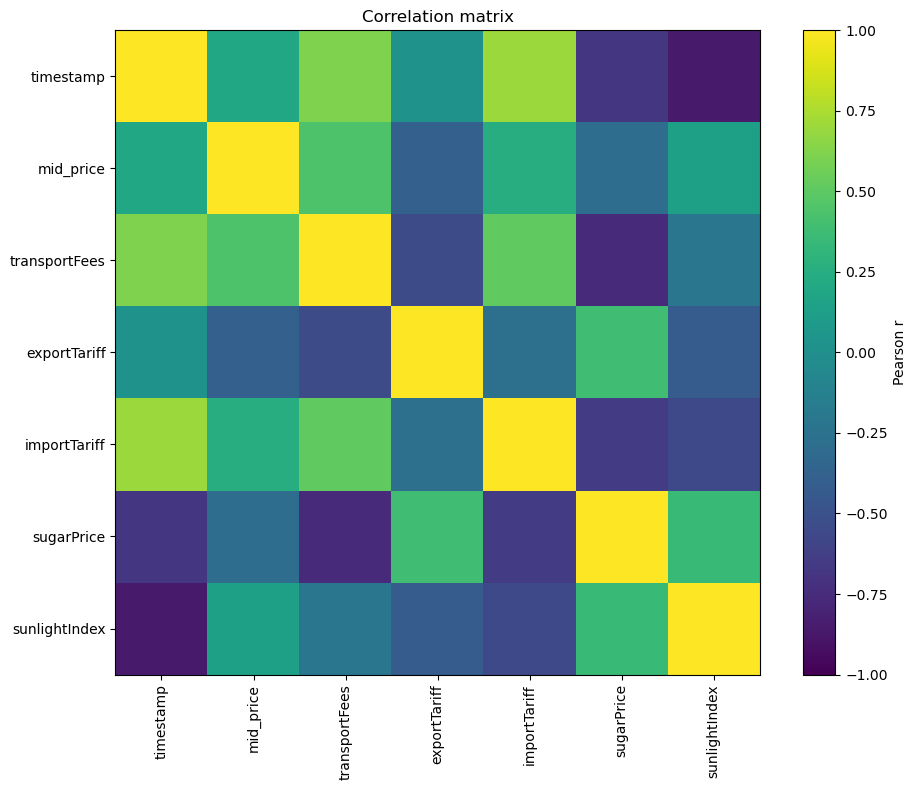

In [690]:
# Correlation Matrix
import matplotlib.pyplot as plt

# 1. select numeric columns
exclude = [
    'ask_price_1','bid_price_1',
    'bid_price_2','bid_price_3',
    'ask_price_2','ask_price_3',
    'ask_volume_1','bid_volume_1',
    'ask_volume_2','bid_volume_2',
    'ask_volume_3','bid_volume_3',
    'day', 'profit_and_loss',
    'askPrice', 'bidPrice'
]

# select numbers and drop
num_df = df.select_dtypes(include='number').drop(columns=exclude)

# 2. full correlation matrix
corr_matrix = num_df.corr()

# 3a. get correlations with mid_price, sorted descending
corr_with_mid = corr_matrix['mid_price'].drop('mid_price') \
                                       .sort_values(ascending=False)
print("Features most positively correlated with mid_price:")
print(corr_with_mid)

# 3b. Or sort by absolute value to see both strong positive and negative
corr_abs = corr_with_mid.abs().sort_values(ascending=False)
print("\nFeatures most strongly (pos or neg) correlated with mid_price:")
print(corr_abs)

# (optional) visualize full matrix with matplotlib
plt.figure(figsize=(10,8))
plt.imshow(corr_matrix, vmin=-1, vmax=1)
plt.colorbar(label='Pearson r')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.index)
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()


In [691]:
from sklearn.linear_model import LinearRegression

features = [
    'sugarPrice',
    'exportTariff',
    'transportFees',
    'importTariff',
    'sunlightIndex'
]

lr = LinearRegression()
lr.fit(df[features], df['mid_price'])

print("Intercept:", lr.intercept_)
print("Coefficients:")
for feat, coef in zip(features, lr.coef_):
    print(f"  {feat}: {coef:.4f}")


Intercept: -221.08806595484305
Coefficients:
  sugarPrice: 1.7429
  exportTariff: 11.0174
  transportFees: 170.4492
  importTariff: 33.1679
  sunlightIndex: 2.8743


In [692]:
# compute R^2 on the same data you trained on
r2 = lr.score(df[features], df['mid_price'])
print(f"R^2: {r2:.4f}")


R^2: 0.2875


In [693]:
import statsmodels.api as sm

X = sm.add_constant(df[features])
y = df['mid_price']

ols = sm.OLS(y, X).fit()
print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:              mid_price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     806.3
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        05:30:15   Log-Likelihood:                -50609.
No. Observations:               10000   AIC:                         1.012e+05
Df Residuals:                    9994   BIC:                         1.013e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -221.0881     47.982     -4.608

In [694]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# exclude the constant
X_no_const = X.drop(columns='const')
vif = pd.DataFrame({
    'feature': X_no_const.columns,
    'VIF': [variance_inflation_factor(X_no_const.values, i)
            for i in range(X_no_const.shape[1])]
})
print(vif)


         feature          VIF
0     sugarPrice  2513.655261
1   exportTariff  1235.603343
2  transportFees   190.241970
3   importTariff    93.373425
4  sunlightIndex   250.891535


# Future predictions

In [695]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. build X and y
X = df[features].copy()
y = df['mid_price'].shift(-1)    # tomorrow’s price

# 2. drop the last row (where y is NaN)
X, y = X.iloc[:-1], y.iloc[:-1]

# 3. fit & score
lr = LinearRegression().fit(X, y)
print("One‑step R²:", lr.score(X, y))

# 4. inspect coefficients
print("Intercept:", lr.intercept_)
for f, c in zip(features, lr.coef_):
    print(f"{f:15s}: {c:.4f}")


One‑step R²: 0.28759627643745633
Intercept: -216.24352901323175
sugarPrice     : 1.7171
exportTariff   : 11.0562
transportFees  : 170.2462
importTariff   : 33.1201
sunlightIndex  : 2.8773


In [696]:
import pandas as pd

def lag_corr(feat, max_lag=10):
    out = {}
    for lag in range(1, max_lag+1):
        c = df[feat].corr(df['mid_price'].shift(-lag))
        out[lag] = c
    return pd.Series(out)

for feat in features:
    print(f"\n{feat}:")
    print(lag_corr(feat, max_lag=5))



sugarPrice:
1   -0.283778
2   -0.284672
3   -0.285613
4   -0.286592
5   -0.287560
dtype: float64

exportTariff:
1   -0.388954
2   -0.389104
3   -0.389305
4   -0.389528
5   -0.389791
dtype: float64

transportFees:
1    0.438136
2    0.438447
3    0.438753
4    0.439102
5    0.439493
dtype: float64

importTariff:
1    0.244551
2    0.244683
3    0.244816
4    0.244965
5    0.245132
dtype: float64

sunlightIndex:
1    0.134856
2    0.134899
3    0.134938
4    0.134973
5    0.135003
dtype: float64


In [697]:
from statsmodels.tsa.stattools import grangercausalitytests

# prepare a 2‑col DataFrame and drop any NaNs
data = df[['mid_price'] + features].dropna()

for feat in features:
    print(f"\nGranger test: does {feat} → mid_price?")
    # maxlag=3 is just an example
    res = grangercausalitytests(data[['mid_price', feat]], maxlag=3, verbose=False)
    # print the p‑value from the 2nd lag’s F‑test:
    pval = res[2][0]['ssr_ftest'][1]
    print(f"  lag 2 p‑value = {pval:.4f}")



Granger test: does sugarPrice → mid_price?
  lag 2 p‑value = 0.0000

Granger test: does exportTariff → mid_price?
  lag 2 p‑value = 0.3665

Granger test: does transportFees → mid_price?
  lag 2 p‑value = 0.0187

Granger test: does importTariff → mid_price?
  lag 2 p‑value = 0.4593

Granger test: does sunlightIndex → mid_price?
  lag 2 p‑value = 0.5356


/Users/andriyluchko/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/andriyluchko/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/andriyluchko/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/andriyluchko/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/andriyluchko/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [698]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# parameters
window = 1
orig_feats = [
    'sugarPrice',
    'exportTariff',
    'transportFees',
    'importTariff',
    'sunlightIndex'
]

# 1) build X: delta of each 10‑tick rolling mean of your raw features
X = pd.DataFrame(index=df.index)
for f in orig_feats:
    roll = df[f].rolling(window, min_periods=1).mean()
    X[f'{f}_dmean'] = roll.diff()

# 2) build y: next‑tick change in the *raw* mid_price
y = df['mid_price'].shift(-1) - df['mid_price']

# 3) drop any rows where X or y is NaN
data = pd.concat([X, y.rename('mid_delta')], axis=1).dropna()
X_clean = data[X.columns]
y_clean = data['mid_delta']

# 4) fit & evaluate
lr = LinearRegression().fit(X_clean, y_clean)
print("R² on one‑tick Δ mid_price:", lr.score(X_clean, y_clean))
print("Coefficients:")
for feat, coef in zip(X_clean.columns, lr.coef_):
    print(f"  {feat}: {coef:.4f}")


R² on one‑tick Δ mid_price: 0.0005418834489860913
Coefficients:
  sugarPrice_dmean: 0.0541
  exportTariff_dmean: 0.8693
  transportFees_dmean: 9.6977
  importTariff_dmean: 1.6303
  sunlightIndex_dmean: -4.1697


In [699]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# your raw DataFrame
# df['mid_price'], and the five orig_feats

# parameters
window   = 50          # for rolling‑mean features
horizons = [5, 10, 20, 50]  # try multiple horizons

# build X once: the 10‑tick rolling‑mean deltas
orig_feats = [
    'sugarPrice',
    'exportTariff',
    'transportFees',
    'importTariff',
    'sunlightIndex'
]

X = pd.DataFrame(index=df.index)
for f in orig_feats:
    roll = df[f].rolling(window, min_periods=1).mean()
    X[f'{f}_dmean'] = roll.diff()

# helper to fit & return R²
def fit_horizon(h):
    # target: mid_price change over h ticks
    y = df['mid_price'].shift(-h) - df['mid_price']
    data = pd.concat([X, y.rename('mid_delta')], axis=1).dropna()
    Xc = data[X.columns]
    yc = data['mid_delta']
    lr = LinearRegression().fit(Xc, yc)
    return lr.score(Xc, yc), lr.intercept_, dict(zip(Xc.columns, lr.coef_))

# run over horizons
results = {}
for h in horizons:
    r2, intercept, coefs = fit_horizon(h)
    results[h] = (r2, intercept, coefs)

# display
for h,(r2, intercept, coefs) in results.items():
    print("Intercept =", intercept)
    print(f"Horizon = {h:2d} ticks →  R² = {r2:.4f}")
    for feat,coef in coefs.items():
        if abs(coef)>0:
            print(f"   {feat:20s}: {coef:.4f}")
    print()


Intercept = 0.030709287676943094
Horizon =  5 ticks →  R² = 0.0003
   sugarPrice_dmean    : 2.1409
   exportTariff_dmean  : -0.3200
   transportFees_dmean : -34.5284
   importTariff_dmean  : -9.9973
   sunlightIndex_dmean : 23.2008

Intercept = 0.07947349677205122
Horizon = 10 ticks →  R² = 0.0013
   sugarPrice_dmean    : 6.7308
   exportTariff_dmean  : 8.3576
   transportFees_dmean : -120.0056
   importTariff_dmean  : -70.0738
   sunlightIndex_dmean : 49.8070

Intercept = 0.16006153939001358
Horizon = 20 ticks →  R² = 0.0027
   sugarPrice_dmean    : 13.9592
   exportTariff_dmean  : 61.7524
   transportFees_dmean : -205.3753
   importTariff_dmean  : -136.0188
   sunlightIndex_dmean : 102.0373

Intercept = 0.33327811328582885
Horizon = 50 ticks →  R² = 0.0071
   sugarPrice_dmean    : 16.2258
   exportTariff_dmean  : 460.7622
   transportFees_dmean : -715.7968
   importTariff_dmean  : 181.3921
   sunlightIndex_dmean : 275.6152

